In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("cars.csv");

In [3]:
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1133,Audi,A8,2016,premium unleaded (required),450.0,8.0,AUTOMATIC,all wheel drive,4.0,"Luxury,High-Performance",Large,Sedan,29,18,3105,90500
9155,Dodge,Shadow,1992,regular unleaded,152.0,4.0,MANUAL,front wheel drive,2.0,Performance,Compact,Convertible,24,18,1851,2000
9733,Hyundai,Sonata,2016,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,36,25,1439,27350
11339,Nissan,Versa Note,2016,regular unleaded,109.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,40,31,2009,17980
7857,Infiniti,Q70,2015,premium unleaded (required),330.0,6.0,AUTOMATIC,all wheel drive,4.0,"Luxury,Performance",Large,Sedan,24,17,190,52000


## Check Missing Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
np.round((df.isnull().sum()/len(df)*100).sort_values(ascending=False),2)

Market Category      31.41
Engine HP             0.58
Engine Cylinders      0.25
Number of Doors       0.05
Engine Fuel Type      0.03
Make                  0.00
Model                 0.00
Year                  0.00
Transmission Type     0.00
Driven_Wheels         0.00
Vehicle Size          0.00
Vehicle Style         0.00
highway MPG           0.00
city mpg              0.00
Popularity            0.00
MSRP                  0.00
dtype: float64

<h3>Observation</h3>
<ul>
    <li>All column missing value are <30%  so we can not drop it</li>
</ul>

## 1. Treating : Droping row/column

#### Treat a Market Category  column
#### We need to drop this column

In [6]:
df.drop("Market Category",axis=1,inplace=True)

#### Treat a Engine HP column

In [7]:
df["Engine HP"].describe()

count    11845.00000
mean       249.38607
std        109.19187
min         55.00000
25%        170.00000
50%        227.00000
75%        300.00000
max       1001.00000
Name: Engine HP, dtype: float64

In [8]:
# we fill null data as mean of column
df["Engine HP"].fillna(df["Engine HP"].mean(),inplace=True)

In [9]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP             0
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

#### Treat a Engine Fuel Type column

In [10]:
df["Engine Fuel Type"].value_counts()

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

##### Describe
##### We need to drop this 3 rows

In [11]:
df[df["Engine Fuel Type"].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,18499


In [12]:
df = df[df["Engine Fuel Type"].notnull()]

In [13]:
df[df["Engine Fuel Type"].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [14]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP             0
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [15]:
df["Engine Cylinders"].value_counts()

4.0     4752
6.0     4486
8.0     2031
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
Name: Engine Cylinders, dtype: int64

In [16]:
## All data are float so we can use mean or median
df["Engine Cylinders"].describe()

count    11881.000000
mean         5.628735
std          1.780774
min          0.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: Engine Cylinders, dtype: float64

In [17]:
## Means And 50% are nearest data so we can use mean for fill null values
df["Engine Cylinders"].fillna(df["Engine Cylinders"].mean(),inplace=True)

In [18]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

#### Treat a Number of Doors column

In [19]:
df["Number of Doors"].describe()

count    11905.000000
mean         3.435951
std          0.881381
min          2.000000
25%          2.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: Number of Doors, dtype: float64

In [20]:
df["Number of Doors"].fillna(df["Number of Doors"].mean(),inplace=True)

In [21]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

# Standerdizing The Values

### 1. Handling Incorrect Data Types

In [22]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [23]:
df["Vehicle Style"].value_counts()

Sedan                  3045
4dr SUV                2488
Coupe                  1211
Convertible             793
4dr Hatchback           702
Crew Cab Pickup         681
Extended Cab Pickup     623
Wagon                   592
2dr Hatchback           506
Passenger Minivan       417
Regular Cab Pickup      392
2dr SUV                 138
Passenger Van           128
Cargo Van                95
Cargo Minivan            71
Convertible SUV          29
Name: Vehicle Style, dtype: int64

<p>
    Describe <br>
    All Columns are proper
</p>

In [24]:
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1550,Cadillac,ATS,2016,regular unleaded,335.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,Sedan,30,20,1624,48110
8919,Volvo,S70,1998,regular unleaded,168.0,5.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,27,17,870,2000
3172,Chevrolet,Cruze,2017,regular unleaded,153.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,37,28,1385,23945
4843,Subaru,Forester,2016,regular unleaded,170.0,4.0,MANUAL,all wheel drive,4.0,Midsize,4dr SUV,29,22,640,25295
4259,Lotus,Evora,2011,premium unleaded (required),276.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,27,18,613,64000


# Univariate analysis

### Engine HP

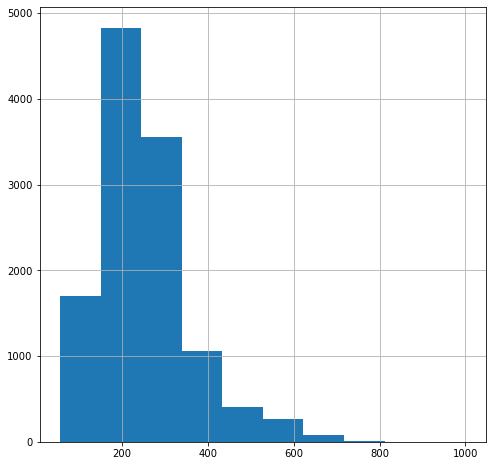

In [25]:
df['Engine HP'].hist(figsize=(8,8))
plt.show()

<p>"Engine HP" attribute is not symmetric.</p>
<p>it is right-skewed.</p>

In [26]:
cap = np.percentile(df["Engine HP"],90)
print(cap)

385.0


In [27]:
def capping_val(x):
    if x > cap:
        x = cap
    return x

df["Engine HP"] = df["Engine HP"].apply(capping_val)

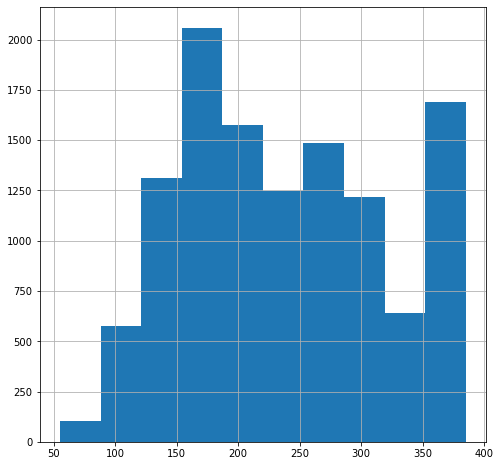

In [28]:
df['Engine HP'].hist(figsize=(8,8))
plt.show()

### Engine Cylinders

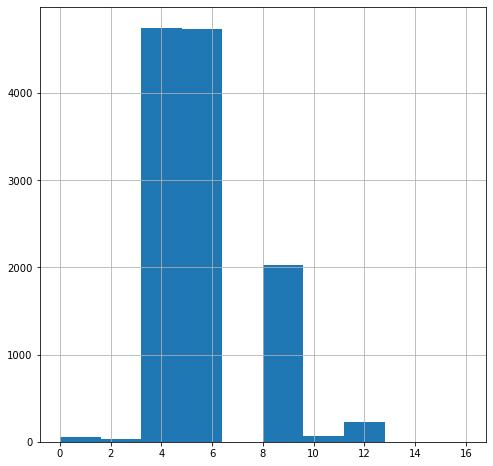

In [29]:
df['Engine Cylinders'].hist(figsize=(8,8))
plt.show()

####  Description about the distribution
<p>This histogram of "Engine Cylinders" shows that:</p>
<ul>
    <li>In this data the Engine Cylinders atrribute varies within the range of 0 to 13.</li>
    <li>Most Engine Cylinders use between 3 to 6, they are roughly 5200 cars</li>
    <li>Also Cylinders are you 8 to 9 they are roughly 2100 cars or less</li>
    <li>they are less than 30 cars are use less than 3 cylinders</li>
</ul>

## Number of Doors

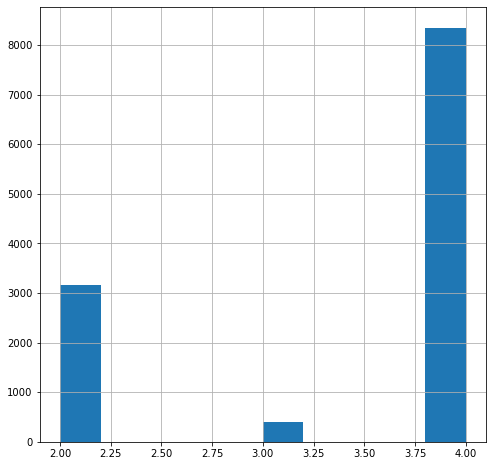

In [30]:
df['Number of Doors'].hist(figsize=(8,8))
plt.show()

####  Description about the distribution
<p>This histogram of "Number of Doors" shows that:</p>
<ul>
    <li>In this data the Number of Doors atrribute varies within the range of 2 to 4.</li>
    <li>Most use 4 doors, they are roughly more than 8000 cars</li>
    <li>Also use 3 doors, they are roughly 500 cars or less</li>
    <li>they use 2 doors, they are roughly 3200 cars</li>
</ul>

##  highway MPG

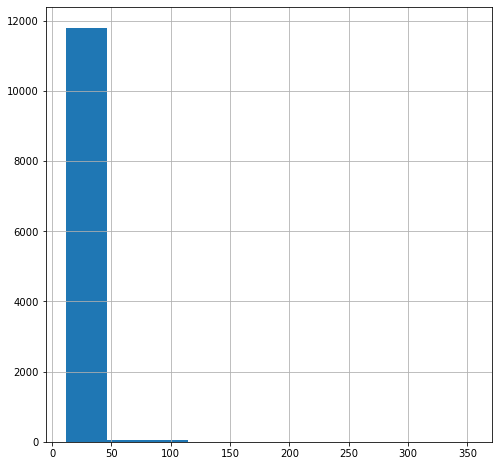

In [31]:
df['highway MPG'].hist(figsize=(8,8))
plt.show()

####  Description about the distribution
<p>This histogram of "highway MPG" shows that:</p>
<ul>
    <li>In this data the highway MPG atrribute varies within the range of 30 to 110.</li>
    <li>Most use 20 to 40 MPG, they are roughly 11000 Cars</li>
    <li>Also use 40 to 130 MPG, they are roughly Less than 100 Cars</li>
</ul>

## Make & Popularity

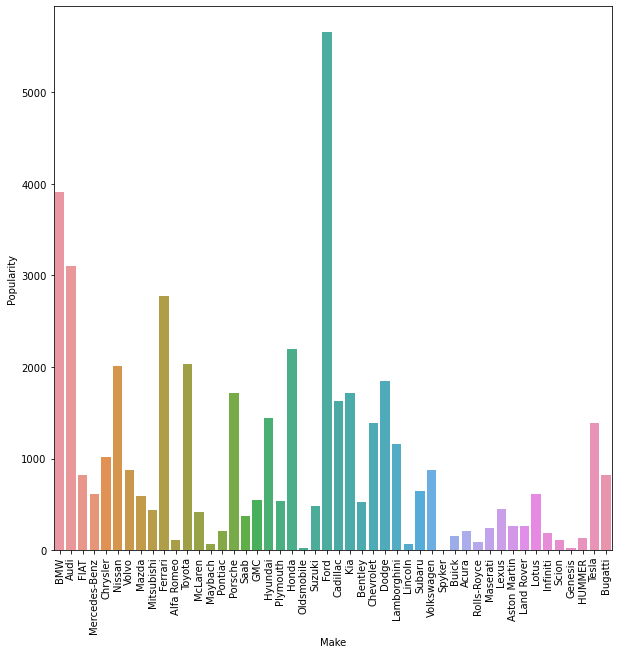

In [32]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x=df["Make"],y=df["Popularity"])

plt.show()

####  Description about the distribution
<p>This barplot of "Make" and "Popularity" shows that:</p>
<ul>
    <li>The maximum populer car is Frod, BMW, Audi, Ferrari </li>
    <li>The minimum populer car is Genesis</li>
</ul>

df

## Transmission Type	

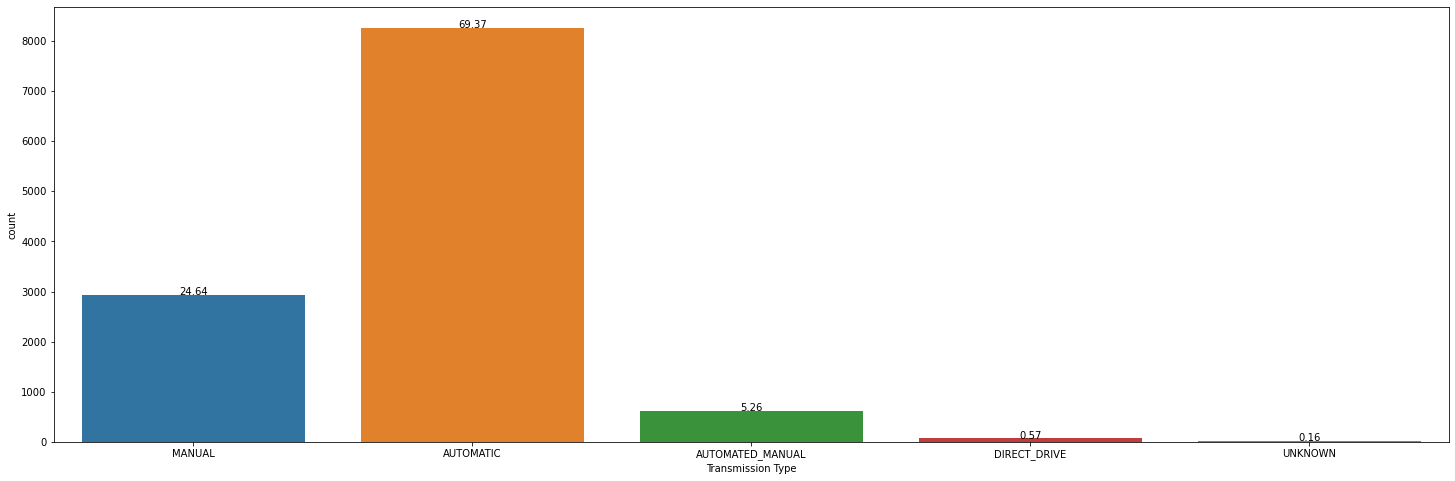

In [33]:
plt.figure(figsize=(25,8))
total = float(len(df) )

ax = sns.countplot(x="Transmission Type", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

####  Description about the distribution
<p>This countplot of "Transmission Type" shows that:</p>
<ul>
    <li>the total automated cars are 9000 that was around 69.37%.</li>
    <li>the total Direct Drive cars are minimum it's 0.57%</li>
</ul>

# Bivariate analysis

#### i. Boxplot (Popularity with MSRP)

In [34]:
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
3320,Oldsmobile,Cutlass Ciera,1993,regular unleaded,160.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Wagon,26,18,26,2000
9633,Chevrolet,Silverado 1500,2017,regular unleaded,355.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Crew Cab Pickup,23,16,1385,37430
4216,Lotus,Esprit,2002,premium unleaded (required),350.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,21,14,613,89825
6797,Chevrolet,Metro,2000,regular unleaded,79.0,4.0,MANUAL,front wheel drive,4.0,Compact,Sedan,38,31,1385,2000
6962,Pontiac,Montana,2005,regular unleaded,185.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,23,16,210,30420


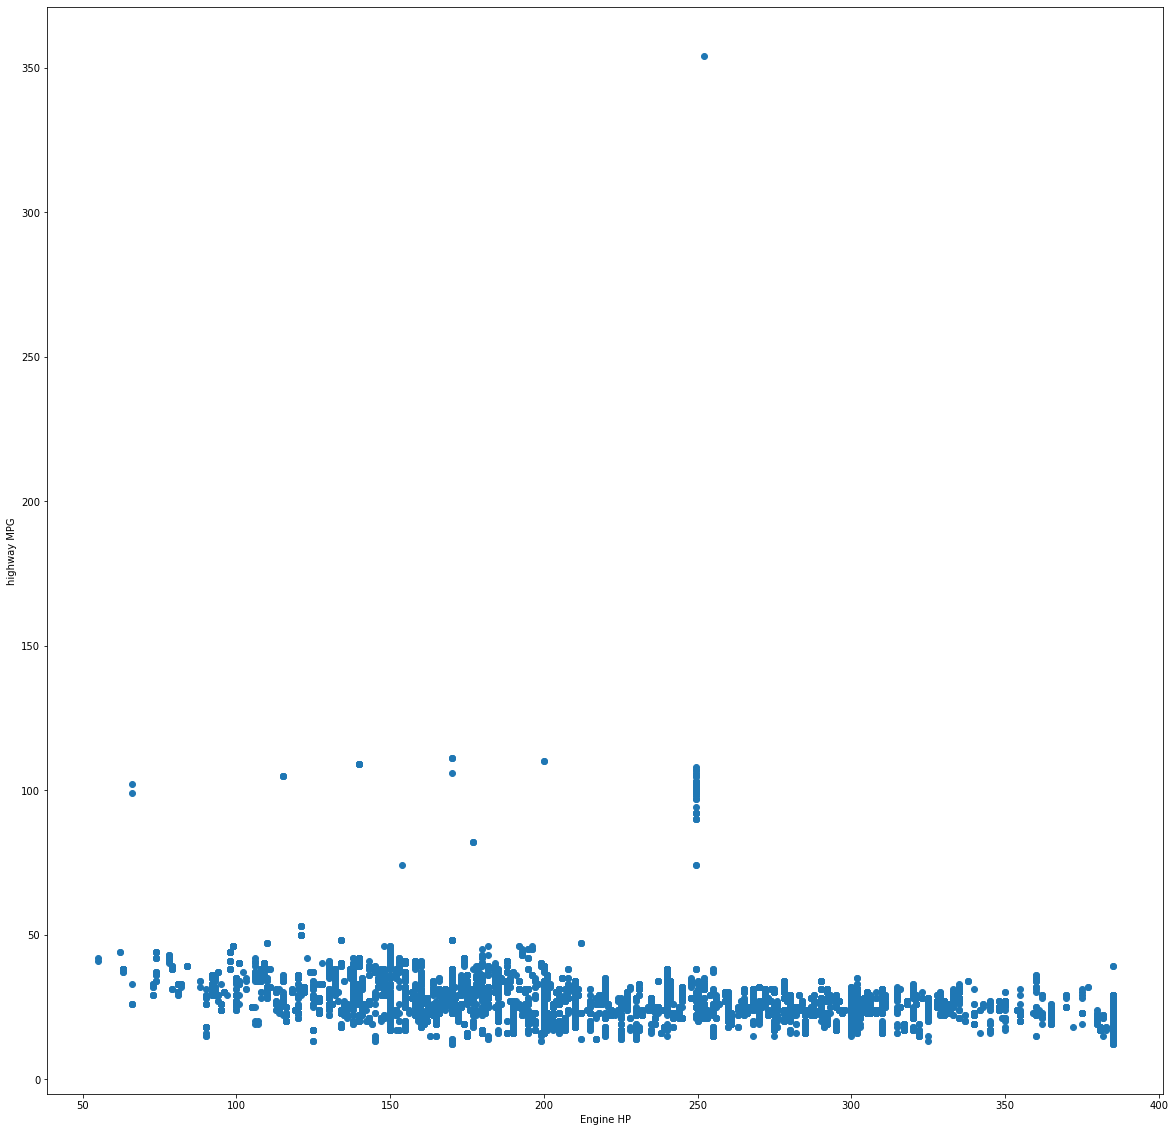

In [35]:
plt.figure(figsize=(20,20))
plt.xlabel("Engine HP")
plt.ylabel("highway MPG")
plt.scatter(x=df["Engine HP"],y=df["highway MPG"])
plt.show()

####  Description about the distribution
<p>This scatter plot of "Engine HP" & "highway MPG" shows that:</p>
<ul>
    <li>the maximum cars Engine HP high speed between 20 to 50</li>
    <li>The highest Highway MPG of Engine HP are 370</li>
    <li>Some cars have 50 to 120 Highway MPG and there Engine HP are between 30 to 250</li>
</ul>

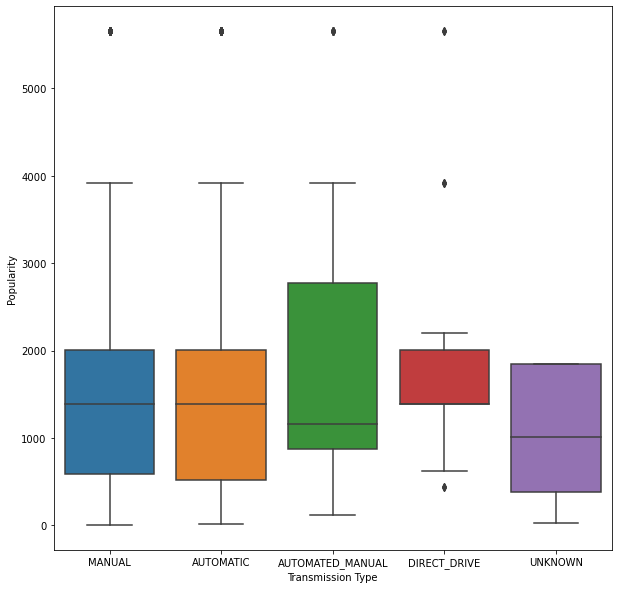

In [36]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df["Transmission Type"],y=df["Popularity"])
plt.show()

### Desctioption about distribution
- Some popularity are taking manual cars are between 800 to 2000
- Some popularity are taking Automatic cars are between 700 to 2000
- Some popularity are taking Automatic and manual cars are between 1000 to 2800
- Some popularity are taking manual cars are between 1500 to 2300

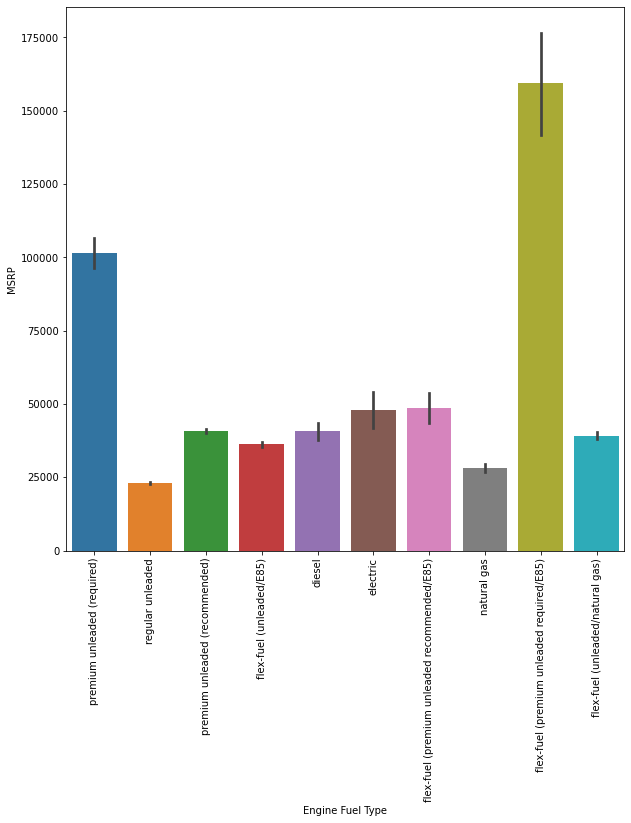

In [37]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x=df["Engine Fuel Type"],y=df["MSRP"])
plt.show()

####  Description about the distribution
- The maximum MSRP are use flex-fuel type
- the minimum MSRP are use reguler inleaded type

## Multivariete Analysis
### Scatter Plot

In [38]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


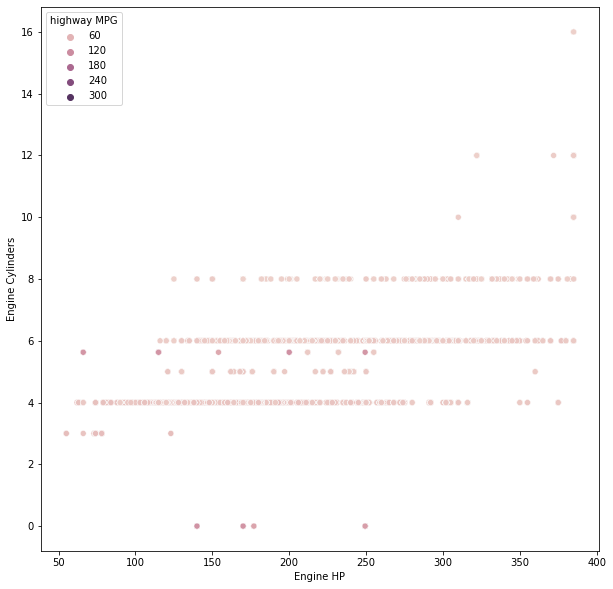

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df["Engine HP"],y=df["Engine Cylinders"],hue=df["highway MPG"])
plt.show()

####  Description about the distribution
- the most engine scylinder are use 4 , 6 , and 8 tey hp beetween 60 to 320 and they speed are  between 60 to 120

<AxesSubplot:>

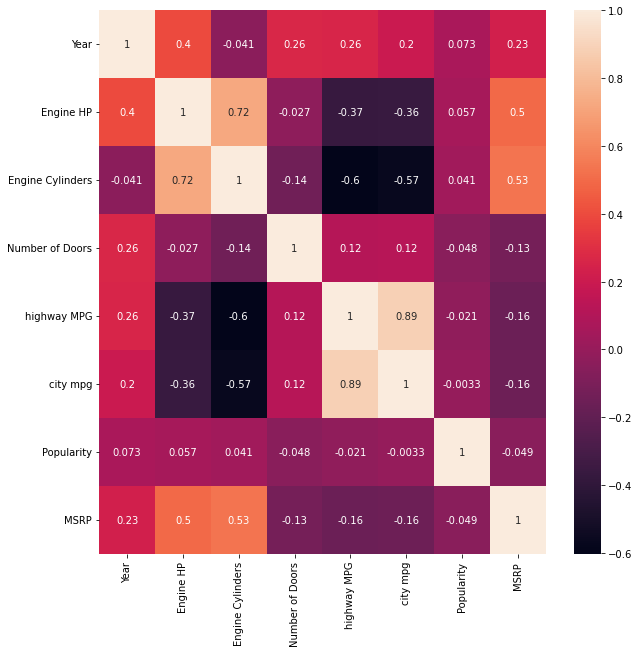

In [46]:
plt.figure(figsize=(10,10))
cor1 = df.corr()
sns.heatmap(cor1, annot=True)